## OpenCV二值化閾值

將灰階影像以一個數值為界線將數值低於此數都改為0，高於此數都改為255(圖片像素變為非黑即白)，即為二值化操作，此篇將會介紹OpenCV二值化函式以及自動決定二值化閾值的算法。
1. threshold函式
2. Otsu算法
3. 自適應二值化

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
%matplotlib inline

In [2]:
print('openCV version:', cv2.__version__)
print('python version:', sys.version)

openCV version: 4.1.2
python version: 3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


## threshold函式

在OpenCV中可以使用`cv2.threshold()`實現將圖片依照指定閾值進行圖片二值化操作，函式如下:

`retval, dst = cv2.threshold(src, thresh, maxval, type)`

retval為二值化數值，dst為輸出的圖片，src為輸入圖片，thresh為設定的二值化閾值(當type為`cv2.THRSEH_OTSU`或`cv2.THRESH_TRIANGLE`時無效)，maxval為超過閾值的數值要改為什麼數字(當type為`cv2.THRESH_BINARY`或`cv2.THRESH_BINARY_INV`時有效)，type為二值化類型。

二值化類型有以下幾種:

`THRESH_BINARY`:大於thresh為maxval，小於等於thresh為0。

$
dst(x,y)=\begin{cases}
maxval,&\quad src(x,y) > thresh \\
0,&\quad src(x,y) \leq thresh
\end{cases}
$

`THRESH_BINARY_INV`:大於thresh為0，小於等於thresh為maxval。

$
dst(x,y)=\begin{cases}
0,&\quad src(x,y) > thresh \\
maxval,&\quad src(x,y) \leq thresh
\end{cases}
$

`THRESH_TRUNC`:大於thresh為thresh，小於等於thresh為0。

$
dst(x,y)=\begin{cases}
thresh,&\quad src(x,y) > thresh \\
0,&\quad src(x,y) \leq thresh
\end{cases}
$

`THRESH_TOZERO_INV`: → 大於thresh為0，小於等於thresh不變。

$
dst(x,y)=\begin{cases}
0,&\quad src(x,y) > thresh \\
src(x,y),&\quad src(x,y) \leq thresh
\end{cases}
$

`THRESH_TOZERO`:大於thresh不變，小於等於thresh為0。

$
dst(x,y)=\begin{cases}
src(x,y),&\quad src(x,y) > thresh \\
0,&\quad src(x,y) \leq thresh
\end{cases}
$

`THRESH_MASK`:在OpenCV 3.0以上已無法使用(已淘汰)。

`THRESH_OTSU`:用Otsu算法取得閾值及二值化圖片。

`THRESH_TRIANGLE`:用Triangle算法取得閾值及二值化圖片。

![Imgur](https://i.imgur.com/yplnFmD.png)

原圖


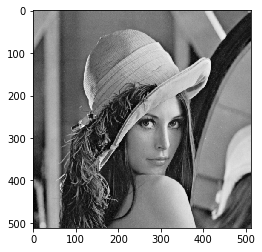

cv2.THRESH_BINARY


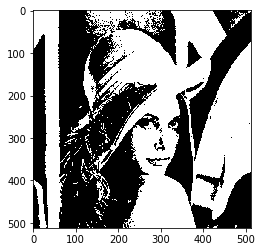

cv2.THRESH_BINARY_INV


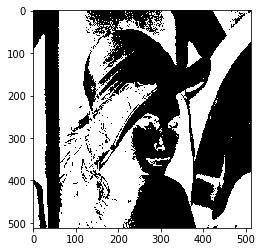

cv2.THRESH_TRUNC


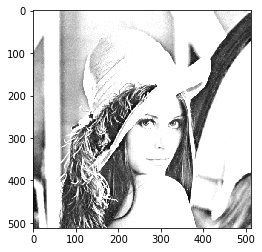

cv2.THRESH_TOZERO_INV


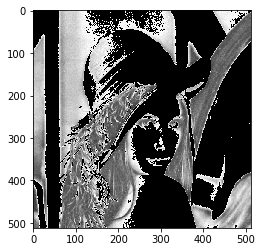

cv2.THRESH_TOZERO


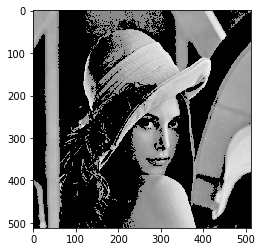

In [3]:
# 嘗試上列五種二值化類型
img_BGR = cv2.imread('data/Lenna.png')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)

print('原圖')
plt.imshow(img_gray, cmap = 'gray')
plt.show()

threshold_types = [['cv2.THRESH_BINARY', cv2.THRESH_BINARY], ['cv2.THRESH_BINARY_INV', cv2.THRESH_BINARY_INV], 
                   ['cv2.THRESH_TRUNC', cv2.THRESH_TRUNC], ['cv2.THRESH_TOZERO_INV', cv2.THRESH_TOZERO_INV], 
                   ['cv2.THRESH_TOZERO', cv2.THRESH_TOZERO]]
for types in threshold_types:
    retval, dst = cv2.threshold(img_gray, 127, 255, types[1])
    print(types[0])
    plt.imshow(dst, cmap = 'gray')
    plt.show()

## Otsu算法

很多時候圖片的灰階數值分布不是以255的一半127為界就可以完美的切開輪廓位置，或是批量圖片進行二值化時，不是每張圖片都適用相同的二值化閾值，此時Otsu算法可以提供一個有數學及統計根據的二值化閾值，簡單來說Otsu算法就是窮舉所有二值化閾值可能的值將影像分為兩群，目標是找出使得組內變異數最小組間變異數最大的二值化閾值。

在調用OpenCV的Otsu算法時比較特別，公式中`retval, dst = cv2.threshold(src, thresh, maxval, type)`thresh不影響結果，type為`cv2.THRESH_OTSU`，有些範例會寫`cv2.THRESH_BINARY + cv2.THRESH_OTSU`，經實測效果相同，因為`cv2.THRESH_OTSU`預設就是得到thresh之後以`cv2.THRESH_BINARY`處理，可以自由變換組合來嘗試效果。

原圖


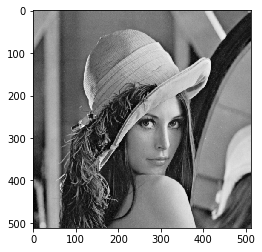

cv2.THRESH_BINARY


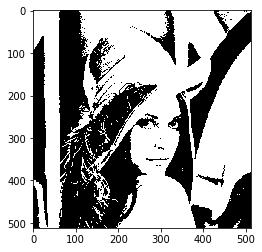

cv2.THRESH_BINARY_INV


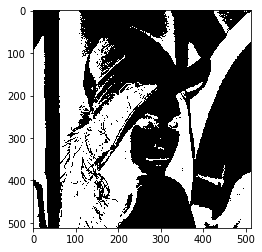

cv2.THRESH_TRUNC


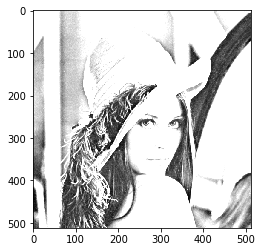

cv2.THRESH_TOZERO_INV


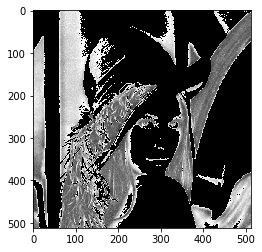

cv2.THRESH_TOZERO


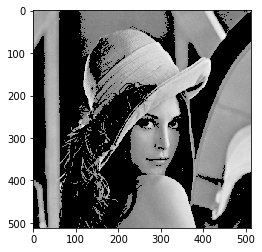

In [4]:
# 嘗試上列五種二值化類型 + Otsu
print('原圖')
plt.imshow(img_gray, cmap = 'gray')
plt.show()

threshold_types = [['cv2.THRESH_BINARY', cv2.THRESH_BINARY], ['cv2.THRESH_BINARY_INV', cv2.THRESH_BINARY_INV], 
                   ['cv2.THRESH_TRUNC', cv2.THRESH_TRUNC], ['cv2.THRESH_TOZERO_INV', cv2.THRESH_TOZERO_INV], 
                   ['cv2.THRESH_TOZERO', cv2.THRESH_TOZERO]]
for types in threshold_types:
    retval, dst = cv2.threshold(img_gray, 0, 255, types[1] + cv2.THRESH_OTSU)
    print(types[0])
    plt.imshow(dst, cmap = 'gray')
    plt.show()

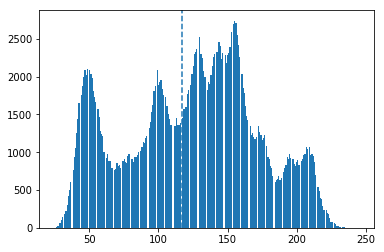

Otsu取得的二值化閾值: 117.0


In [5]:
# 用plt取得影像直方圖
plt.hist(img_gray.ravel(), 256)
# 以虛線畫出Otsu算出的二值化閾值
plt.axvline(retval, linestyle= '--')
plt.show()
print('Otsu取得的二值化閾值:', retval)

> 由於Otsu算法是尋找兩個組間變異數最大的切分點，所以最適合的應用場景是雙峰分布的灰階影像，可以獲得最好的效果，另外，Otsu算法容易受到雜訊干擾，若影像包含雜訊，最好先利用高斯模糊進行降噪。

> ![Imgur](https://i.imgur.com/8ctFIJj.png)

> 另外`cv2.THRESH_TRIANGLE`也是尋找二值化閾值的算法，適合單峰分布的灰階影像。

## 自適應二值化

有些時候圖像會因為光源或是擺放方向的關係導致部分區域較亮，部分區域較暗，此時就沒有一個最佳的二值化閾值可以將圖片完美二值化，OpenCV提供了自適應二值化方法來將此類圖片進行二值化，由於此方法不是由單一數值將圖片進行二值化，而是每個像素點都存在一個二值化的閾值，函式如下:

`dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)`

dst為輸出的圖片，src為輸入圖片，maxValue為最大值，adaptiveMethod為自適應方法，thresholdType為二值化類型(只能是`THRESH_BINARY`或`THRESH_BINARY_INV`)，blockSize為逐像素計算時所參考的鄰域尺寸(必須為奇數)，C為常數。

adaptiveMethod有兩種，差別在計算平均值的方式有所不同:

`ADAPTIVE_THRESH_MEAN_C`:周圍鄰域的像素平均後減去常數C作為該像素的二值化閾值。

`ADAPTIVE_THRESH_GAUSSIAN_C`:透過高斯矩陣取得各點所要配置的權重再進行平均，最後再減去常數C。

原圖


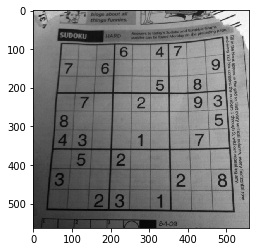

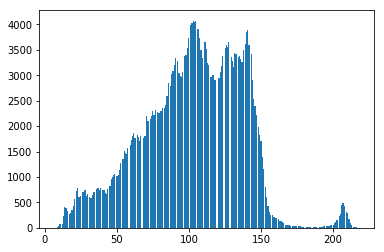

手動設定閾值為127


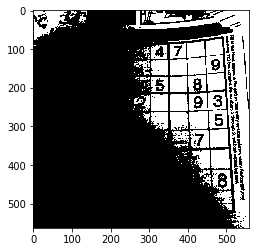

由Otsu決定二值化閾值


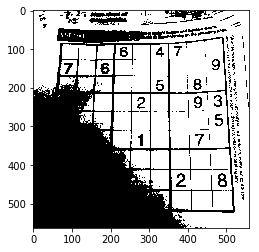

自適應二值化mean


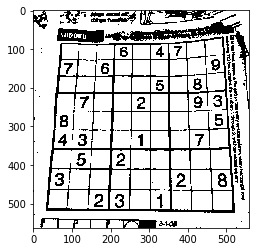

自適應二值化gaussian


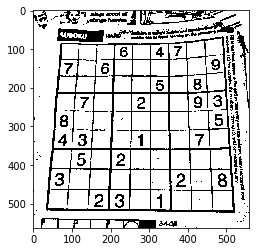

In [6]:
# 比較上列各種二值化方式
img_BGR_sudoku = cv2.imread('data/sudoku.png')
img_RGB_sudoku = cv2.cvtColor(img_BGR_sudoku, cv2.COLOR_BGR2RGB)
img_gray_sudoku = cv2.cvtColor(img_RGB_sudoku, cv2.COLOR_RGB2GRAY)

print('原圖')
plt.imshow(img_gray_sudoku, cmap = 'gray')
plt.show()

# 用plt取得影像直方圖
plt.hist(img_gray_sudoku.ravel(), 256)
plt.show()

# 手動設定閾值為127
retval, dst1 = cv2.threshold(img_gray_sudoku, 127, 255, cv2.THRESH_BINARY)
# 由Otsu決定二值化閾值
retval, dst2 = cv2.threshold(img_gray_sudoku, 0, 255, cv2.THRESH_OTSU)
# 自適應二值化mean
dst3 = cv2.adaptiveThreshold(img_gray_sudoku, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 73, 5)
# 自適應二值化gaussian
dst4 = cv2.adaptiveThreshold(img_gray_sudoku, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 73, 5)

print('手動設定閾值為127')
plt.imshow(dst1, cmap = 'gray')
plt.show()
print('由Otsu決定二值化閾值')
plt.imshow(dst2, cmap = 'gray')
plt.show()
print('自適應二值化mean')
plt.imshow(dst3, cmap = 'gray')
plt.show()
print('自適應二值化gaussian')
plt.imshow(dst4, cmap = 'gray')
plt.show()

> 遇到色彩不均勻且有漸層陰影的圖片，最好還是使用自適應方式進行二值化，效果會較好。